# Libraries

In [1]:
import scipy.io as sio
import sys

import pandas as pd
import numpy as np

import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.api import VAR
import statistics

sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts

In [2]:
sst = sio.loadmat('data/sst.mat')
sst

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:14:49 2013',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[array([[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]])],
        [array([[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]])],
        [array([[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]])],
        ...,
        [array([[29.58, 29.12,

In [3]:
N = len(sst['X'])
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


# Applying the Discrete Cosine Transform

In [4]:
tensor_shape = (len(sst['X']), sst['X'][0][0].shape[0], sst['X'][0][0].shape[1])
tensor_shape

(2000, 5, 6)

In [5]:
tensor_data = np.zeros(tensor_shape)
for i in range(tensor_shape[0]):
    tensor_data[i] = sst['X'][i][0]
tensor_data

array([[[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]],

       [[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]],

       [[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]],

       ...,

       [[29.58, 29.12, 29.23, 28.31, 27.29, 27.73],
        [29.33, 28.95, 28.56, 25.8 , 25.68, 23.33],
        [29.65, 28.86, 28.2 , 25.91, 23.54, 22.22],
        [30.19, 29.18, 28.15, 26.98, 25.32, 2

In [6]:
train_tensor = jts.extract_train_tensor(tensor_data, N_train)
train_tensor

array([[[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]],

       [[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]],

       [[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]],

       ...,

       [[29.21, 29.03, 28.53, 28.37, 27.62, 27.97],
        [29.48, 28.78, 28.19, 26.28, 25.95, 25.73],
        [29.04, 28.46, 27.52, 25.5 , 23.52, 22.35],
        [29.49, 29.14, 28.04, 27.61, 25.64, 2

In [7]:
test_tensor = jts.extract_test_tensor(tensor_data, N_train, N_test)
test_tensor

array([[[29.32, 29.01, 28.58, 28.38, 27.63, 27.98],
        [29.45, 28.74, 28.19, 26.29, 25.96, 25.69],
        [29.  , 28.42, 27.52, 25.5 , 23.62, 22.75],
        [29.49, 29.14, 28.03, 27.61, 25.62, 24.38],
        [29.85, 29.48, 28.6 , 27.61, 26.28, 24.48]],

       [[29.35, 29.  , 28.6 , 28.39, 27.64, 27.99],
        [29.46, 28.75, 28.21, 26.32, 25.98, 25.68],
        [28.99, 28.41, 27.54, 25.54, 23.7 , 22.9 ],
        [29.48, 29.15, 28.05, 27.62, 25.65, 24.42],
        [29.83, 29.48, 28.62, 27.62, 26.29, 24.51]],

       [[29.29, 28.93, 28.62, 28.4 , 27.66, 28.  ],
        [29.47, 28.76, 28.24, 26.35, 25.97, 25.69],
        [29.01, 28.41, 27.58, 25.58, 23.74, 22.92],
        [29.48, 29.17, 28.08, 27.65, 25.67, 24.46],
        [29.84, 29.48, 28.67, 27.64, 26.32, 24.58]],

       ...,

       [[29.58, 29.12, 29.23, 28.31, 27.29, 27.73],
        [29.33, 28.95, 28.56, 25.8 , 25.68, 23.33],
        [29.65, 28.86, 28.2 , 25.91, 23.54, 22.22],
        [30.19, 29.18, 28.15, 26.98, 25.32, 2

In [8]:
train_dct_tensor = jts.apply_dct_to_tensor(train_tensor)
train_dct_tensor

array([[[ 3.41580000e+02, -2.88603771e+00,  1.68008928e+00,
         -5.23259018e-01, -3.00000000e-02, -6.65722417e-01],
        [ 3.34640000e+02,  5.06318330e+00, -9.52627944e-01,
         -5.65685425e-02, -4.70000000e-01, -2.05031092e+00],
        [ 3.23060000e+02,  9.32519587e+00, -3.22161450e+00,
          2.68700577e-01,  9.40000000e-01,  1.20761002e+00],
        [ 3.33440000e+02,  7.05143101e+00, -4.36476804e+00,
          2.40416306e+00, -2.60000000e-01,  1.50068830e-01],
        [ 3.42500000e+02,  7.77305158e+00, -2.23434554e+00,
         -8.34386002e-01, -8.30000000e-01, -3.02107863e-01]],

       [[ 3.42280000e+02, -3.29588758e+00,  1.74937132e+00,
         -5.65685425e-01,  2.90000000e-01, -9.90719472e-01],
        [ 3.35060000e+02,  4.71822402e+00, -7.44781847e-01,
         -1.55563492e-01, -4.70000000e-01, -1.99929040e+00],
        [ 3.23660000e+02,  8.80258057e+00, -3.03108891e+00,
          4.10121933e-01,  6.70000000e-01,  1.26482228e+00],
        [ 3.34120000e+02,  6.5

In [9]:
matrix_shape = train_dct_tensor[0].shape
train_dct_tensor_model_sets = np.zeros((matrix_shape[1], N_train, matrix_shape[0]))
for i in range(matrix_shape[1]):
    for j in range(N_train):
        train_dct_tensor_model_sets[i][j] = train_dct_tensor[j][:,i]
train_dct_tensor_model_sets

array([[[ 3.41580000e+02,  3.34640000e+02,  3.23060000e+02,
          3.33440000e+02,  3.42500000e+02],
        [ 3.42280000e+02,  3.35060000e+02,  3.23660000e+02,
          3.34120000e+02,  3.42880000e+02],
        [ 3.43140000e+02,  3.36040000e+02,  3.24520000e+02,
          3.35100000e+02,  3.43540000e+02],
        ...,
        [ 3.41460000e+02,  3.28820000e+02,  3.12780000e+02,
          3.28440000e+02,  3.32360000e+02],
        [ 3.41420000e+02,  3.28640000e+02,  3.12880000e+02,
          3.28360000e+02,  3.32400000e+02],
        [ 3.41580000e+02,  3.28660000e+02,  3.13180000e+02,
          3.28460000e+02,  3.32460000e+02]],

       [[-2.88603771e+00,  5.06318330e+00,  9.32519587e+00,
          7.05143101e+00,  7.77305158e+00],
        [-3.29588758e+00,  4.71822402e+00,  8.80258057e+00,
          6.57882086e+00,  7.78164569e+00],
        [-3.66710041e+00,  4.02729009e+00,  8.52454259e+00,
          6.06517131e+00,  7.86095047e+00],
        ...,
        [ 4.47235927e+00,  1.2235356

In [10]:
test_tensor_model_sets = np.zeros((matrix_shape[1], N_test, matrix_shape[0]))
for i in range(matrix_shape[1]):
    for j in range(N_test):
        test_tensor_model_sets[i][j] = test_tensor[j][:,i]
test_tensor_model_sets

array([[[29.32, 29.45, 29.  , 29.49, 29.85],
        [29.35, 29.46, 28.99, 29.48, 29.83],
        [29.29, 29.47, 29.01, 29.48, 29.84],
        ...,
        [29.58, 29.33, 29.65, 30.19, 30.24],
        [29.61, 29.36, 29.78, 30.22, 30.26],
        [29.61, 29.45, 29.68, 30.41, 30.3 ]],

       [[29.01, 28.74, 28.42, 29.14, 29.48],
        [29.  , 28.75, 28.41, 29.15, 29.48],
        [28.93, 28.76, 28.41, 29.17, 29.48],
        ...,
        [29.12, 28.95, 28.86, 29.18, 29.48],
        [29.16, 28.95, 28.94, 29.28, 29.48],
        [29.18, 28.97, 29.  , 29.28, 29.48]],

       [[28.58, 28.19, 27.52, 28.03, 28.6 ],
        [28.6 , 28.21, 27.54, 28.05, 28.62],
        [28.62, 28.24, 27.58, 28.08, 28.67],
        ...,
        [29.23, 28.56, 28.2 , 28.15, 28.95],
        [29.25, 28.58, 28.28, 28.43, 29.26],
        [29.28, 28.61, 28.28, 28.49, 29.42]],

       [[28.38, 26.29, 25.5 , 27.61, 27.61],
        [28.39, 26.32, 25.54, 27.62, 27.62],
        [28.4 , 26.35, 25.58, 27.65, 27.64],
        ..

In [11]:
result_tensor_model_sets = np.zeros((matrix_shape[1], N_test, matrix_shape[0]))
result_tensor_model_sets.shape

(6, 200, 5)

# Building the Models

In [12]:
for i in range(tensor_shape[2]):
    train_df = pd.DataFrame(train_dct_tensor_model_sets[i])
    test_df = pd.DataFrame(test_tensor_model_sets[i])
    train_diff = train_df#.diff().dropna()
    model = VAR(train_diff)
    fit = model.fit(5)
    
    test_df.columns = test_df.columns[:].astype(str)
    results_diff = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_df = results_diff #jts.invert_diff_transformation(results_diff, train_df)
    result_tensor_model_sets[i] = result_df
result_tensor_model_sets

array([[[ 3.41738124e+02,  3.28745480e+02,  3.13419643e+02,
          3.28623723e+02,  3.32566516e+02],
        [ 3.41879697e+02,  3.28858703e+02,  3.13702135e+02,
          3.28827993e+02,  3.32704203e+02],
        [ 3.42037001e+02,  3.29007000e+02,  3.13981151e+02,
          3.29045127e+02,  3.32856253e+02],
        ...,
        [ 3.40020218e+02,  3.29413355e+02,  3.18443734e+02,
          3.31271789e+02,  3.35113365e+02],
        [ 3.40019617e+02,  3.29424675e+02,  3.18463097e+02,
          3.31280113e+02,  3.35123136e+02],
        [ 3.40019069e+02,  3.29436026e+02,  3.18482404e+02,
          3.31288403e+02,  3.35132880e+02]],

       [[ 4.51448419e+00,  1.20434012e+01,  2.01489677e+01,
          1.50239744e+01,  1.54621954e+01],
        [ 4.49432440e+00,  1.19685637e+01,  1.99896068e+01,
          1.48982471e+01,  1.53800337e+01],
        [ 4.47717698e+00,  1.19187458e+01,  1.99042178e+01,
          1.48095948e+01,  1.53210512e+01],
        ...,
        [ 5.46027197e+00,  1.1651901

# Inverting the DCT

In [13]:
result_tensor_model_sets

array([[[ 3.41738124e+02,  3.28745480e+02,  3.13419643e+02,
          3.28623723e+02,  3.32566516e+02],
        [ 3.41879697e+02,  3.28858703e+02,  3.13702135e+02,
          3.28827993e+02,  3.32704203e+02],
        [ 3.42037001e+02,  3.29007000e+02,  3.13981151e+02,
          3.29045127e+02,  3.32856253e+02],
        ...,
        [ 3.40020218e+02,  3.29413355e+02,  3.18443734e+02,
          3.31271789e+02,  3.35113365e+02],
        [ 3.40019617e+02,  3.29424675e+02,  3.18463097e+02,
          3.31280113e+02,  3.35123136e+02],
        [ 3.40019069e+02,  3.29436026e+02,  3.18482404e+02,
          3.31288403e+02,  3.35132880e+02]],

       [[ 4.51448419e+00,  1.20434012e+01,  2.01489677e+01,
          1.50239744e+01,  1.54621954e+01],
        [ 4.49432440e+00,  1.19685637e+01,  1.99896068e+01,
          1.48982471e+01,  1.53800337e+01],
        [ 4.47717698e+00,  1.19187458e+01,  1.99042178e+01,
          1.48095948e+01,  1.53210512e+01],
        ...,
        [ 5.46027197e+00,  1.1651901

In [14]:
result_dct_tensor = np.zeros((N_test, matrix_shape[0], matrix_shape[1]))
result_dct_tensor

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 

In [15]:
for i in range(N_test):
    for j in range(matrix_shape[1]):
        result_dct_tensor[i][:,j] = result_tensor_model_sets[j][i]
result_dct_tensor

array([[[ 3.41738124e+02,  4.51448419e+00,  4.87591696e-01,
         -3.57202625e-01,  9.13455535e-01, -9.13170988e-01],
        [ 3.28745480e+02,  1.20434012e+01,  1.32802626e+00,
         -1.41569459e+00,  3.52253026e-01,  1.60128280e+00],
        [ 3.13419643e+02,  2.01489677e+01, -2.27434075e+00,
         -7.23081157e-01,  5.82010123e-01,  3.63166500e-01],
        [ 3.28623723e+02,  1.50239744e+01, -3.05691276e+00,
          1.68629172e+00, -2.24648494e-02, -1.49162927e+00],
        [ 3.32566516e+02,  1.54621954e+01, -3.22431888e+00,
          1.69596645e+00, -9.84760162e-01,  1.81094239e-01]],

       [[ 3.41879697e+02,  4.49432440e+00,  4.79513894e-01,
         -3.25252610e-01,  9.08313622e-01, -8.77945889e-01],
        [ 3.28858703e+02,  1.19685637e+01,  1.37237837e+00,
         -1.40595258e+00,  3.74792407e-01,  1.56602995e+00],
        [ 3.13702135e+02,  1.99896068e+01, -2.17433981e+00,
         -7.44224384e-01,  6.06974156e-01,  3.58969279e-01],
        [ 3.28827993e+02,  1.4

In [16]:
result_tensor = jts.apply_inverse_dct_to_tensor(result_dct_tensor)
result_tensor

array([[[29.26996452, 29.00768647, 28.5737471 , 28.39409395,
         27.64418241, 27.97938772],
        [29.45756642, 28.7342045 , 28.17726522, 26.2889888 ,
         25.93929117, 25.77542391],
        [29.01271612, 28.43829685, 27.50791457, 25.48223988,
         23.60430692, 22.66434709],
        [29.49527268, 29.13670556, 28.03388205, 27.61544899,
         25.64140321, 24.38914896],
        [29.86332828, 29.47902649, 28.59347079, 27.60093583,
         26.27697953, 24.46951697]],

       [[29.28220717, 29.01004865, 28.58731808, 28.40559326,
         27.66712962, 27.98755165],
        [29.46286112, 28.73406996, 28.17212545, 26.30395224,
         25.95078303, 25.80555959],
        [29.02444338, 28.44188269, 27.51404377, 25.49848552,
         23.63948168, 22.73273023],
        [29.49871927, 29.13991861, 28.04164803, 27.6246345 ,
         25.67135019, 24.43772583],
        [29.86742712, 29.47974726, 28.60058799, 27.60341718,
         26.29947156, 24.50145034]],

       [[29.29252994, 29.0

In [17]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "VAR with DCT"})
error

,VAR with DCT
0,0.000951479
1,0.00168187
2,0.00188354
3,0.00222599
4,0.00354661
...,...
195,0.025828
196,0.0249994
197,0.0250034
198,0.0254856


<AxesSubplot:>

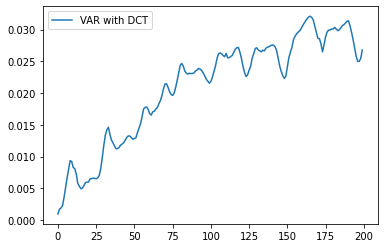

In [18]:
error.plot()

<AxesSubplot:>

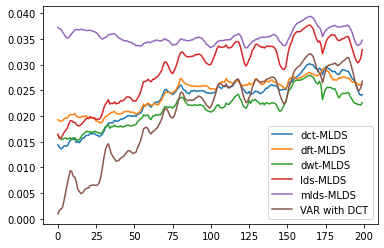

In [19]:
sst_err = sio.loadmat('data/sst_err.mat')
df = pd.DataFrame(np.transpose(sst_err['err_dct']), index=error.index, columns=["dct-MLDS"])
df1 = pd.DataFrame(np.transpose(sst_err['err_dft']), index=error.index, columns=["dft-MLDS"])
df2 = pd.DataFrame(np.transpose(sst_err['err_dwt']), index=error.index, columns=["dwt-MLDS"])
df3 = pd.DataFrame(np.transpose(sst_err['err_lds']), index=error.index, columns=["lds-MLDS"])
df4 = pd.DataFrame(np.transpose(sst_err['err_mlds']), index=error.index, columns=["mlds-MLDS"])
#tensor_unfold_err = pd.read_csv("data/VAR_with_unfold.csv")
#del tensor_unfold_err['Unnamed: 0']
df = pd.concat([df, df1, df2, df3, df4, error], axis=1)
df.plot()

In [20]:
df = pd.concat([tensor_unfold_err, error], axis=1)
df.plot()

NameError: name 'tensor_unfold_err' is not defined

<AxesSubplot:title={'center':'Difference in % error with unfold and DCT'}>

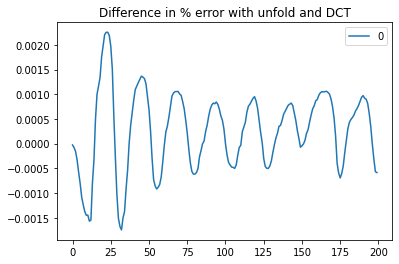

In [193]:
df = pd.DataFrame(tensor_unfold_err['VAR with Tensor Unfold'] - error['VAR with DCT'])
df.plot(title="Difference in % error with unfold and DCT")

<AxesSubplot:>

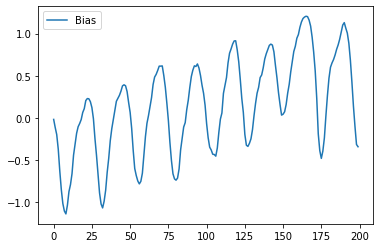

In [194]:
bias = pd.DataFrame(index = range(N_test), columns = ["Bias"])

norms = []
for i in range(N_test):
    norms.append(np.linalg.norm(result_tensor[i]))

avg_result_matrix_norm = np.average(norms)

for i in range(N_test):

    test_matrx_norm = np.linalg.norm(test_tensor[i])
    matrix_bias = avg_result_matrix_norm - test_matrx_norm
    bias.iloc[i] = matrix_bias
bias.plot()

In [195]:
bias.mean()

Bias    0.144674
dtype: float64

In [196]:
statistics.variance(norms)

0.013507049135225147

In [197]:
sqr_error = 0
for i in range(N_test):
    sqr_error += (norms[i] - np.linalg.norm(test_tensor[i]))**2
sqr_error / N_test

0.28306666263804464

In [198]:
error.mean()

VAR with DCT    0.017864
dtype: float64